Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 3

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploration, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Share at least 1 visualization on Slack.

(If you have not yet completed an initial model yet for your portfolio project, then do today's assignment using your Tanzania Waterpumps model.)

## Stretch Goals
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox.I Get readable category names on your plot, instead of integer category codes.

## Links
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

In [0]:
lat, lon = 26.4332,-81.401
year = 2010
api_key = 'OjVCw5oOv4BRmcldYUf4RIQrWrgIfbRMXISJubzX'
attributes = 'ghi,dhi,dni,wind_speed,air_temperature,solar_zenith_angle,wind_speed,cloud_type,fill_flag,relative_humidity,surface_albedo,surface_pressure,wind_direction,dew_point'

leap_year = 'false'
interval = '30'
utc = 'true'
your_name = 'John+Smith'
reason_for_use = 'beta+testing'
your_affiliation = 'my+institution'

your_email = 'matthewlsessions@gmail.com'
mailing_list = 'true'

import pandas as pd

year = '2010'

df1 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df1 = df1.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))




In [0]:
year = '2011'

df2 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df2 = df2.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df2])

In [0]:
year = '2012'
leap_year = 'true'
dfl = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


dfl = dfl.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=527040/int(interval)))

df1 = pd.concat([df1,dfl])

In [0]:
year = '2013'

leap_year = 'false'
df3 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df3 = df3.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df3])

In [0]:
year = '2014'

df4 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df4 = df4.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df4])

In [5]:
year = 2015

df5 = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


df5 = df5.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

df1 = pd.concat([df1,df5])
df1.tail()

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
2015-12-31 21:30:00,2015,12,31,21,30,129,89,167,1.0,27,76.50,3,0,74.56,0.147,1010.0,178.3,22
2015-12-31 22:00:00,2015,12,31,22,0,63,51,87,0.7,26,82.15,7,4,81.76,0.147,1010.0,181.2,22
2015-12-31 22:30:00,2015,12,31,22,30,12,12,0,0.6,25,88.03,8,4,86.77,0.147,1010.0,181.2,22
2015-12-31 23:00:00,2015,12,31,23,0,0,0,0,0.6,25,94.09,8,0,84.97,0.147,1010.0,174.5,22
2015-12-31 23:30:00,2015,12,31,23,30,0,0,0,0.6,25,100.30,7,0,84.97,0.147,1010.0,174.5,22


In [0]:
year = '2016'
leap_year = 'true'
test = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


test = test.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=527040/int(interval)))

In [7]:
features = ['Wind Speed','Temperature','Solar Zenith Angle','Pressure','Surface Albedo']
target = 'GHI'

from xgboost import XGBRegressor

boost = XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)

boost.fit(df1[features],df1[target])

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

y_pred_train = boost.predict(df1[features])

print(r2_score(df1[target],y_pred_train))
print(mean_absolute_error(df1[target],y_pred_train))

y_pred_test = boost.predict(test[features])

print(r2_score(test[target],y_pred_test))
print(mean_absolute_error(test[target],y_pred_test))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[19:16:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8753781807103351
55.06734826156486
0.8675882014917855
55.52386579931441


In [9]:
!pip install pdpbox


     |████████████████████████████████| 57.7MB 1.2MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.0-cp36-none-any.whl size=57690723 sha256=4c78f8b4643f3e9f95694f682b7c0186ddd422c636c3ebb1cde76cb2a69cd838
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot

In [0]:
feature = 'Solar Zenith Angle'

isolated = pdp_isolate(
    model=boost,
    dataset=test,
    model_features=features,
    feature=feature,
    num_grid_points=60
)

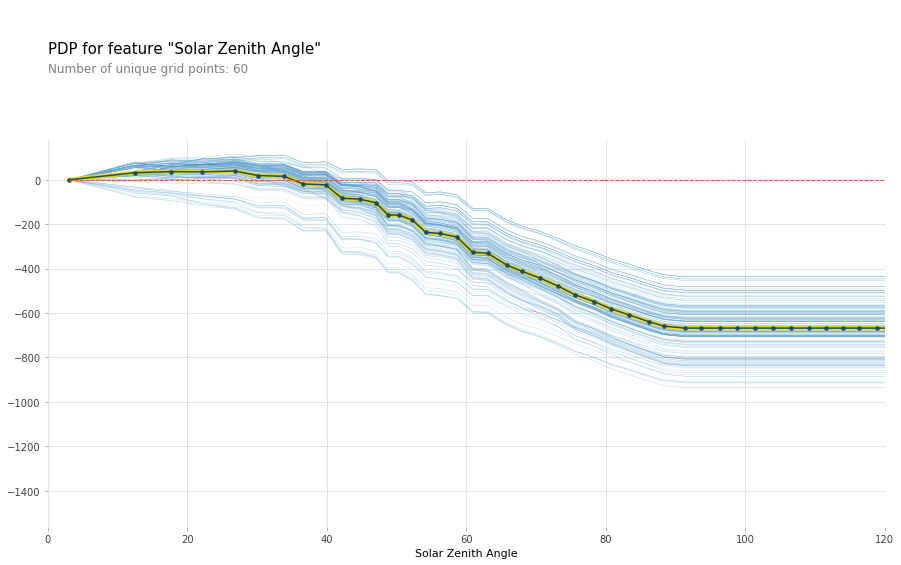

In [32]:
import matplotlib.pyplot as plt


pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=200) 
plt.xlim(0,120);

In [0]:
import requests

a = requests.get('https://api.darksky.net/forecast/dc757f87dbdcb50907cdcecf02328582/42.3601,-71.0589?extend=hourly')

In [0]:
a= a.json()

In [62]:
a

{'currently': {'apparentTemperature': 60.53,
  'cloudCover': 0.53,
  'dewPoint': 38.72,
  'humidity': 0.44,
  'icon': 'partly-cloudy-day',
  'nearestStormBearing': 218,
  'nearestStormDistance': 402,
  'ozone': 308,
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1026.04,
  'summary': 'Mostly Cloudy',
  'temperature': 60.53,
  'time': 1568836749,
  'uvIndex': 2,
  'visibility': 10,
  'windBearing': 34,
  'windGust': 13.72,
  'windSpeed': 10.08},
 'daily': {'data': [{'apparentTemperatureHigh': 61.8,
    'apparentTemperatureHighTime': 1568826000,
    'apparentTemperatureLow': 46.15,
    'apparentTemperatureLowTime': 1568887200,
    'apparentTemperatureMax': 61.8,
    'apparentTemperatureMaxTime': 1568826000,
    'apparentTemperatureMin': 53.61,
    'apparentTemperatureMinTime': 1568865600,
    'cloudCover': 0.55,
    'dewPoint': 42.99,
    'humidity': 0.57,
    'icon': 'partly-cloudy-day',
    'moonPhase': 0.65,
    'ozone': 303.5,
    'precipIntensity': 0.0001,
    'prec

In [80]:
from datetime import datetime
ts = 1262318400
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2010-01-01 04:00:00


In [0]:
lat, lon = 26.4332,-81.401

In [0]:
a = requests.get('https://api.darksky.net/forecast/dc757f87dbdcb50907cdcecf02328582/42.3601,-71.0589,2010-05-02T00:00:00Z?extend=hourly')

In [0]:
a = a.json()

In [98]:
a['hourly']['data']

[{'apparentTemperature': 57.86,
  'cloudCover': 0.2,
  'dewPoint': 36.09,
  'humidity': 0.44,
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1008.44,
  'summary': 'Partly Cloudy',
  'temperature': 57.86,
  'time': 1272686400,
  'uvIndex': 0,
  'visibility': 9.997,
  'windBearing': 324,
  'windGust': 0.61,
  'windSpeed': 0.61},
 {'apparentTemperature': 57.34,
  'cloudCover': 0.75,
  'dewPoint': 37.59,
  'humidity': 0.48,
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1009,
  'summary': 'Mostly Cloudy',
  'temperature': 57.34,
  'time': 1272690000,
  'uvIndex': 0,
  'visibility': 9.835,
  'windBearing': 299,
  'windGust': 0.31,
  'windSpeed': 0.26},
 {'apparentTemperature': 56.86,
  'cloudCover': 1,
  'dewPoint': 38.21,
  'humidity': 0.5,
  'icon': 'cloudy',
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1008.96,
  'summary': 'Overcast',
  'temperature': 56.86,
  'time': 1

In [0]:
ddark = pd.DataFrame(a['hourly']['data'])

In [100]:
ddark.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipIntensity,precipProbability,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
0,57.86,0.20,36.09,0.44,partly-cloudy-night,0,0,1008.44,Partly Cloudy,57.86,1272686400,0,9.997,324,0.61,0.61
1,57.34,0.75,37.59,0.48,partly-cloudy-night,0,0,1009.00,Mostly Cloudy,57.34,1272690000,0,9.835,299,0.31,0.26
2,56.86,1.00,38.21,0.50,cloudy,0,0,1008.96,Overcast,56.86,1272693600,0,9.822,282,0.28,0.17
3,56.19,0.84,39.35,0.53,partly-cloudy-night,0,0,1008.89,Mostly Cloudy,56.19,1272697200,0,9.762,294,0.24,0.24
4,55.47,0.87,38.27,0.52,partly-cloudy-night,0,0,1009.05,Mostly Cloudy,55.47,1272700800,0,9.997,310,0.64,0.64


In [128]:
!pip install pysolar

In [156]:
from pysolar.solar import *

date = datetime.datetime(2015, 2, 1, 2, 30, tzinfo=datetime.timezone.utc)
float(90) - get_altitude(6.75189646, -75.19042969, date)

138.5961846403272

In [132]:
print(date)

2015-12-31 23:30:00+00:00


In [0]:
def tc(li):
  return(datetime.utcfromtimestamp(li).strftime('%Y-%m-%d %H:%M:%S'))

ddark['date'] = ddark.time.apply(tc)

In [130]:
ddark.head()

,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipIntensity,precipProbability,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,date,cel
0,57.86,0.20,36.09,0.44,partly-cloudy-night,0,0,1008.44,Partly Cloudy,57.86,1272686400,0,9.997,324,0.61,0.61,2010-05-01 04:00:00,14.366667
1,57.34,0.75,37.59,0.48,partly-cloudy-night,0,0,1009.00,Mostly Cloudy,57.34,1272690000,0,9.835,299,0.31,0.26,2010-05-01 05:00:00,14.077778
2,56.86,1.00,38.21,0.50,cloudy,0,0,1008.96,Overcast,56.86,1272693600,0,9.822,282,0.28,0.17,2010-05-01 06:00:00,13.811111
3,56.19,0.84,39.35,0.53,partly-cloudy-night,0,0,1008.89,Mostly Cloudy,56.19,1272697200,0,9.762,294,0.24,0.24,2010-05-01 07:00:00,13.438889
4,55.47,0.87,38.27,0.52,partly-cloudy-night,0,0,1009.05,Mostly Cloudy,55.47,1272700800,0,9.997,310,0.64,0.64,2010-05-01 08:00:00,13.038889


In [135]:
'2010-05-01 08:00:00'.split('-')

['2010', '05', '01 08:00:00']

In [0]:
def sol(li):
  li = str(li)
  date = li.split('-')
  year = int(date[0])
  month = int(date[1])
  day = int(date[2].split(' ')[0])
  hour = int(date[2].split(' ')[1].split(':')[0])
  date2 = datetime.datetime(year, month, day, hour, 0, tzinfo=datetime.timezone.utc)
  zen = float(90) - get_altitude(lat, lon, date2)  
  return(zen)

In [0]:
ddark['zen'] = ddark.date.apply(sol)

In [0]:
ddark['cel'] = (ddark.temperature	-32) / 1.8

In [0]:
lat, lon = 42.3601,-71.0589

year = '2010'
leap_year = 'false'
test = pd.read_csv('http://developer.nrel.gov/api/solar/nsrdb_psm3_download.csv?wkt=POINT({lon}%20{lat})&names={year}&leap_day={leap}&interval={interval}&utc={utc}&full_name={name}&email={email}&affiliation={affiliation}&mailing_list={mailing_list}&reason={reason}&api_key={api}&attributes={attr}'.format(year=year, lat=lat, lon=lon, leap=leap_year, interval=interval, utc=utc, name=your_name, email=your_email, mailing_list=mailing_list, affiliation=your_affiliation, reason=reason_for_use, api=api_key, attr=attributes), skiprows=2)


test = test.set_index(pd.date_range('1/1/{yr}'.format(yr=year), freq=interval+'Min', periods=525600/int(interval)))

In [0]:
test = test.reset_index()

In [168]:
test.head()

,index,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
0,2010-01-01 00:00:00,2010,1,1,0,0,0,0,0,0.7,-3,118.35,7,0,96.75,0.866,1010.0,15.4,-3
1,2010-01-01 00:30:00,2010,1,1,0,30,0,0,0,0.6,-2,123.88,7,0,96.71,0.866,1010.0,15.4,-3
2,2010-01-01 01:00:00,2010,1,1,1,0,0,0,0,0.5,-2,129.41,7,0,97.04,0.866,1010.0,8.4,-3
3,2010-01-01 01:30:00,2010,1,1,1,30,0,0,0,0.5,-2,134.91,7,0,90.07,0.866,1010.0,8.4,-3
4,2010-01-01 02:00:00,2010,1,1,2,0,0,0,0,0.5,-2,140.32,7,0,90.22,0.866,1010.0,1.7,-3


In [169]:
test.dtypes

index                 datetime64[ns]
Year                           int64
Month                          int64
Day                            int64
Hour                           int64
Minute                         int64
GHI                            int64
DHI                            int64
DNI                            int64
Wind Speed                   float64
Temperature                    int64
Solar Zenith Angle           float64
Cloud Type                     int64
Fill Flag                      int64
Relative Humidity            float64
Surface Albedo               float64
Pressure                     float64
Wind Direction               float64
Dew Point                      int64
dtype: object

In [0]:
ddark['date'] = pd.to_datetime(ddark.date)

In [171]:
ddark.dtypes

apparentTemperature           float64
cloudCover                    float64
dewPoint                      float64
humidity                      float64
icon                           object
precipIntensity                 int64
precipProbability               int64
pressure                      float64
summary                        object
temperature                   float64
time                            int64
uvIndex                         int64
visibility                    float64
windBearing                     int64
windGust                      float64
windSpeed                     float64
date                   datetime64[ns]
cel                           float64
zen                           float64
dtype: object

In [0]:
date = pd.merge(test,ddark,left_on='index',right_on='date')

In [173]:
date.head()

,index,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipIntensity,precipProbability,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,date,cel,zen
0,2010-05-01 04:00:00,2010,5,1,4,0,0,0,0,0.3,9,121.81,4,0,93.68,0.08,1000.0,310.6,8,57.86,0.20,36.09,0.44,partly-cloudy-night,0,0,1008.44,Partly Cloudy,57.86,1272686400,0,9.997,324,0.61,0.61,2010-05-01 04:00:00,14.366667,121.826466
1,2010-05-01 05:00:00,2010,5,1,5,0,0,0,0,0.3,9,122.42,4,0,93.12,0.08,1000.0,302.8,7,57.34,0.75,37.59,0.48,partly-cloudy-night,0,0,1009.00,Mostly Cloudy,57.34,1272690000,0,9.835,299,0.31,0.26,2010-05-01 05:00:00,14.077778,122.439911
2,2010-05-01 06:00:00,2010,5,1,6,0,0,0,0,0.4,9,119.79,3,0,91.98,0.08,1000.0,303.4,7,56.86,1.00,38.21,0.50,cloudy,0,0,1008.96,Overcast,56.86,1272693600,0,9.822,282,0.28,0.17,2010-05-01 06:00:00,13.811111,119.802143
3,2010-05-01 07:00:00,2010,5,1,7,0,0,0,0,0.5,9,114.30,0,0,90.16,0.08,1000.0,306.2,7,56.19,0.84,39.35,0.53,partly-cloudy-night,0,0,1008.89,Mostly Cloudy,56.19,1272697200,0,9.762,294,0.24,0.24,2010-05-01 07:00:00,13.438889,114.318249
4,2010-05-01 08:00:00,2010,5,1,8,0,0,0,0,0.4,9,106.64,3,0,94.86,0.08,1000.0,309.8,7,55.47,0.87,38.27,0.52,partly-cloudy-night,0,0,1009.05,Mostly Cloudy,55.47,1272700800,0,9.997,310,0.64,0.64,2010-05-01 08:00:00,13.038889,106.655181


In [174]:
date.shape

(24, 38)

In [176]:
date[['zen','Solar Zenith Angle']]

,zen,Solar Zenith Angle
0,121.826466,121.81
1,122.439911,122.42
2,119.802143,119.79
3,114.318249,114.30
4,106.655181,106.64
5,97.466857,97.46
6,87.040085,87.27
7,76.420344,76.48
8,65.390860,65.42
9,54.408968,54.43


In [180]:
lat = 42.3601

lon = -71.0589

years = [2010,2011]
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

dark = pd.DataFrame([])


for year in years:
	for month in months:
		a = requests.get('https://api.darksky.net/forecast/dc757f87dbdcb50907cdcecf02328582/' + str(lat) +','+ str(lon) +','+ str(year)+'-'+ month + '-05T00:00:00Z?extend=hourly')
		print(a)
		a = a.json()
		dic = a['hourly']['data']
		dark = dark.append(pd.DataFrame(dic),ignore_index=True)

dark.to_csv('first.csv')

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


KeyboardInterrupt: ignored

In [182]:
from google.colab import files
uploaded = files.upload()

Saving first.csv to first.csv


In [0]:
first = pd.read_csv('first.csv')

In [184]:
first.head()

,Unnamed: 0,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed
0,0,22.47,1.00,22.54,0.76,cloudy,NaN,0.0,0.0,NaN,994.16,Overcast,29.10,1262581200,0,9.615,306.0,12.63,6.37
1,1,22.79,1.00,22.76,0.77,cloudy,NaN,0.0,0.0,NaN,994.46,Overcast,29.20,1262584800,0,9.377,305.0,12.88,6.14
2,2,22.86,0.97,23.01,0.77,cloudy,NaN,0.0,0.0,NaN,995.38,Overcast,29.24,1262588400,0,9.615,302.0,11.71,6.10
3,3,23.42,0.69,22.63,0.77,partly-cloudy-night,NaN,0.0,0.0,NaN,995.77,Mostly Cloudy,28.99,1262592000,0,9.613,310.0,11.72,5.12
4,4,23.38,0.08,21.93,0.77,clear-night,NaN,0.0,0.0,NaN,996.24,Clear,28.08,1262595600,0,9.611,298.0,9.08,4.14


In [185]:
first.shape

(576, 19)

In [0]:
def tc(li):
  ts = li
  return(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

In [0]:
first['date'] = first.time.apply(tc)

In [196]:
first.tail(50)

,Unnamed: 0,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,date
526,526,56.51,1.00,54.60,0.93,rain,NaN,0.0188,0.86,rain,1011.73,Light Rain,56.51,1317780000,0,8.214,333.0,6.08,2.48,2011-10-05 02:00:00
527,527,56.18,1.00,54.19,0.93,rain,NaN,0.0080,0.81,rain,1011.82,Drizzle,56.18,1317783600,0,8.846,343.0,4.86,2.54,2011-10-05 03:00:00
528,528,47.54,0.00,42.50,0.83,clear-night,NaN,0.0000,0.00,NaN,1011.97,Clear,47.54,1320379200,0,9.622,242.0,2.48,1.68,2011-11-04 04:00:00
529,529,46.28,0.00,42.06,0.85,clear-night,NaN,0.0000,0.00,NaN,1011.75,Clear,46.28,1320382800,0,8.908,246.0,2.10,1.09,2011-11-04 05:00:00
530,530,45.93,0.00,42.06,0.86,clear-night,NaN,0.0000,0.00,NaN,1011.55,Clear,45.93,1320386400,0,7.572,269.0,2.04,1.06,2011-11-04 06:00:00
531,531,45.80,0.11,41.92,0.86,clear-night,NaN,0.0000,0.00,NaN,1011.81,Clear,45.80,1320390000,0,7.996,306.0,2.08,0.70,2011-11-04 07:00:00
532,532,46.39,0.46,41.69,0.84,partly-cloudy-night,NaN,0.0000,0.00,NaN,1011.99,Partly Cloudy,46.39,1320393600,0,8.205,333.0,2.79,1.68,2011-11-04 08:00:00
533,533,47.02,0.72,41.00,0.79,partly-cloudy-night,NaN,0.0000,0.00,NaN,1012.11,Mostly Cloudy,47.02,1320397200,0,9.873,333.0,4.56,2.65,2011-11-04 09:00:00
534,534,45.26,0.95,39.46,0.75,cloudy,NaN,0.0000,0.00,NaN,1013.04,Overcast,47.06,1320400800,0,9.859,338.0,8.82,4.28,2011-11-04 10:00:00
535,535,44.19,0.48,37.15,0.71,partly-cloudy-night,NaN,0.0000,0.00,NaN,1013.69,Partly Cloudy,46.01,1320404400,0,9.859,339.0,8.45,4.09,2011-11-04 11:00:00


In [198]:
from datetime import datetime
ts = 	1323057600
print(datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S'))

2011-12-05 04:00:00


In [199]:
date.head()

,index,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipIntensity,precipProbability,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,date,cel,zen
0,2010-05-01 04:00:00,2010,5,1,4,0,0,0,0,0.3,9,121.81,4,0,93.68,0.08,1000.0,310.6,8,57.86,0.20,36.09,0.44,partly-cloudy-night,0,0,1008.44,Partly Cloudy,57.86,1272686400,0,9.997,324,0.61,0.61,2010-05-01 04:00:00,14.366667,121.826466
1,2010-05-01 05:00:00,2010,5,1,5,0,0,0,0,0.3,9,122.42,4,0,93.12,0.08,1000.0,302.8,7,57.34,0.75,37.59,0.48,partly-cloudy-night,0,0,1009.00,Mostly Cloudy,57.34,1272690000,0,9.835,299,0.31,0.26,2010-05-01 05:00:00,14.077778,122.439911
2,2010-05-01 06:00:00,2010,5,1,6,0,0,0,0,0.4,9,119.79,3,0,91.98,0.08,1000.0,303.4,7,56.86,1.00,38.21,0.50,cloudy,0,0,1008.96,Overcast,56.86,1272693600,0,9.822,282,0.28,0.17,2010-05-01 06:00:00,13.811111,119.802143
3,2010-05-01 07:00:00,2010,5,1,7,0,0,0,0,0.5,9,114.30,0,0,90.16,0.08,1000.0,306.2,7,56.19,0.84,39.35,0.53,partly-cloudy-night,0,0,1008.89,Mostly Cloudy,56.19,1272697200,0,9.762,294,0.24,0.24,2010-05-01 07:00:00,13.438889,114.318249
4,2010-05-01 08:00:00,2010,5,1,8,0,0,0,0,0.4,9,106.64,3,0,94.86,0.08,1000.0,309.8,7,55.47,0.87,38.27,0.52,partly-cloudy-night,0,0,1009.05,Mostly Cloudy,55.47,1272700800,0,9.997,310,0.64,0.64,2010-05-01 08:00:00,13.038889,106.655181


In [200]:
datetime.fromtimestamp(1272686400)

datetime.datetime(2010, 5, 1, 4, 0)

In [202]:
print(datetime.fromtimestamp(1272686400).strftime('%Y-%m-%d %H:%M:%S'))

2010-05-01 04:00:00


In [204]:
from google.colab import files
uploaded = files.upload()


Saving first.csv to first (1).csv


In [0]:
fir = pd.read_csv('first (1).csv')

In [206]:
fir.head()

,Unnamed: 0,apparentTemperature,cloudCover,dewPoint,humidity,icon,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,date,zen,cel
0,0,22.47,1.00,22.54,0.76,cloudy,NaN,0.0,0.0,NaN,994.16,Overcast,29.10,1262581200,0,9.615,306,12.63,6.37,2010-01-03 21:00:00,86.854089,-1.611111
1,1,22.79,1.00,22.76,0.77,cloudy,NaN,0.0,0.0,NaN,994.46,Overcast,29.20,1262584800,0,9.377,305,12.88,6.14,2010-01-03 22:00:00,96.685833,-1.555556
2,2,22.86,0.97,23.01,0.77,cloudy,NaN,0.0,0.0,NaN,995.38,Overcast,29.24,1262588400,0,9.615,302,11.71,6.10,2010-01-03 23:00:00,107.073061,-1.533333
3,3,23.42,0.69,22.63,0.77,partly-cloudy-night,NaN,0.0,0.0,NaN,995.77,Mostly Cloudy,28.99,1262592000,0,9.613,310,11.72,5.12,2010-01-04 00:00:00,117.938516,-1.672222
4,4,23.38,0.08,21.93,0.77,clear-night,NaN,0.0,0.0,NaN,996.24,Clear,28.08,1262595600,0,9.611,298,9.08,4.14,2010-01-04 01:00:00,128.998990,-2.177778


In [224]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data (4).csv


In [225]:
testdata = pd.read_csv('data (4).csv')
testdata.shape

(35040, 20)

In [226]:
testdata.head(
)

,Unnamed: 0,index,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
0,0,2010-01-01 00:00:00,2010,1,1,0,0,0,0,0,0.7,-3,118.35,7,0,96.75,0.866,1010.0,15.4,-3
1,1,2010-01-01 00:30:00,2010,1,1,0,30,0,0,0,0.6,-2,123.88,7,0,96.71,0.866,1010.0,15.4,-3
2,2,2010-01-01 01:00:00,2010,1,1,1,0,0,0,0,0.5,-2,129.41,7,0,97.04,0.866,1010.0,8.4,-3
3,3,2010-01-01 01:30:00,2010,1,1,1,30,0,0,0,0.5,-2,134.91,7,0,90.07,0.866,1010.0,8.4,-3
4,4,2010-01-01 02:00:00,2010,1,1,2,0,0,0,0,0.5,-2,140.32,7,0,90.22,0.866,1010.0,1.7,-3


In [227]:
testdata.tail()

,Unnamed: 0,index,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Wind Speed,Temperature,Solar Zenith Angle,Cloud Type,Fill Flag,Relative Humidity,Surface Albedo,Pressure,Wind Direction,Dew Point
35035,35035,2011-12-31 21:30:00,2011,12,31,21,30,0,0,0,0.6,2,92.24,4,0,100.0,0.078,1000.0,315.3,2
35036,35036,2011-12-31 22:00:00,2011,12,31,22,0,0,0,0,0.7,2,97.17,7,0,100.0,0.078,1000.0,302.0,2
35037,35037,2011-12-31 22:30:00,2011,12,31,22,30,0,0,0,0.7,2,102.28,4,0,100.0,0.078,1000.0,302.0,2
35038,35038,2011-12-31 23:00:00,2011,12,31,23,0,0,0,0,0.8,2,107.55,3,0,100.0,0.078,1000.0,299.8,2
35039,35039,2011-12-31 23:30:00,2011,12,31,23,30,0,0,0,0.8,2,112.94,4,0,100.0,0.078,1000.0,299.8,2
